In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the data to (num_samples, 28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 555ms/step - loss: 0.2790 - val_loss: 0.0859
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 122s 521ms/step - loss: 0.0842 - val_loss: 0.0787
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 119s 506ms/step - loss: 0.0788 - val_loss: 0.0759
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 526ms/step - loss: 0.0763 - val_loss: 0.0743
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 501ms/step - loss: 0.0748 - val_loss: 0.0729
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 504ms/step - loss: 0.0734 - val_loss: 0.0720
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 517ms/step - loss: 0.0725 - val_loss: 0.0714
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 503ms/step - loss: 0.0719 - val_loss: 0.0709
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 516ms/step - loss: 0.0712 - val_loss: 0.0712
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 506ms/step - loss: 0.0708 - val_loss: 0.0700


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


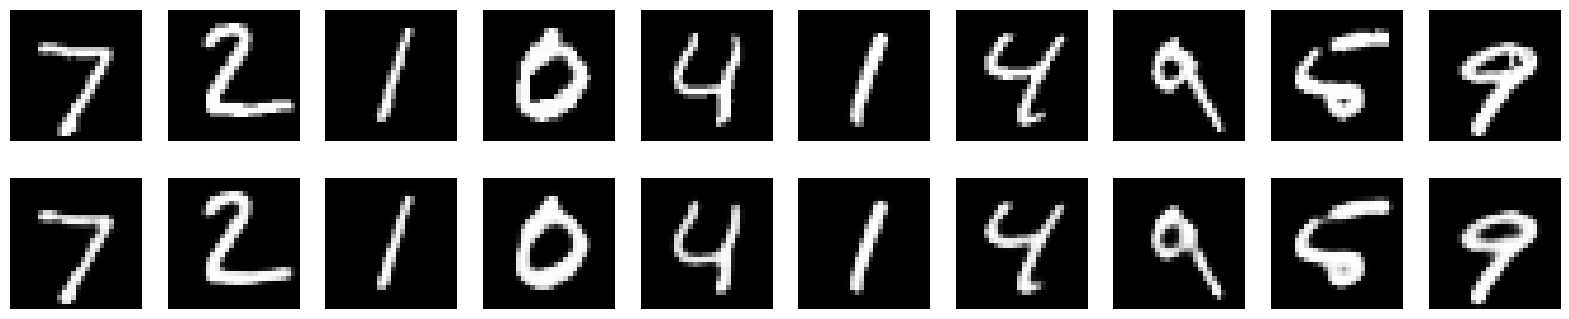

In [5]:
# Reconstruct the images
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()